# Notebook initiation
1.   Mounting drive
2.   Installing plotly
3.   Importing libraries

In [33]:
import plotly.graph_objects as go
import plotly.express as px
import os
import numpy as np
import pandas as pd    
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [3]:
import openslide

def get_properties(wsi_file_path):

    wsi = openslide.open_slide(wsi_file_path)
    wsi_properties = wsi.properties
    x_mpp = wsi_properties[openslide.PROPERTY_NAME_MPP_X]
    y_mpp = wsi_properties[openslide.PROPERTY_NAME_MPP_Y]
    width, height = wsi_properties["openslide.level[0].width"], wsi_properties["openslide.level[0].height"]
    print(x_mpp, y_mpp, width, height)

    return x_mpp, y_mpp, width, height

# Defining input wsi path and dataframes path

In [4]:
wsi_file_path = "/home/SSD/Atishay/Data/WSI/C3L-01663-21.svs"
x_mpp, y_mpp, width, height = get_properties(wsi_file_path)
x_mpp, y_mpp = float(x_mpp), float(y_mpp)
width, height = int(width), int(height)

0.49419999999999997 0.49419999999999997 13943 14869


In [5]:
dataframes_path = "/home/SSD/Atishay/Output/wsi_output/C3L-01663-21/wsi_info"

# Pie chart

## Defining functions

In [6]:
def pie_chart(dataframes_path):

    epithelial_df_path = os.path.join(dataframes_path, "epithelial_df.csv")
    epithelial_df = pd.read_csv(epithelial_df_path)
    
    Lymphocyte_df_path = os.path.join(dataframes_path, "Lymphocyte_df.csv")
    Lymphocyte_df = pd.read_csv(Lymphocyte_df_path)
    
    Macrophage_df_path = os.path.join(dataframes_path, "Macrophage_df.csv")
    Macrophage_df = pd.read_csv(Macrophage_df_path)
    
    Neutrophil_df_path = os.path.join(dataframes_path, "Neutrophil_df.csv")
    Neutrophil_df = pd.read_csv(Neutrophil_df_path)

    n_epithelial = len(epithelial_df)
    n_Lymphocyte = len(Lymphocyte_df)
    n_Macrophage = len(Macrophage_df)
    n_Neutrophil = len(Neutrophil_df)

    labels = ['Epithelial','Lymphocyte','Macrophage','Neutrophil']
    values = [n_epithelial, n_Lymphocyte, n_Macrophage, n_Neutrophil]

    mrg = dict(l = 50, r = 50, b = 50, t = 50, pad = 100)

    fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+value+percent', title="Pie chart representing the proportion and number of different types of nuclei")])

    fig.update_layout(font_size=18,font_family="Courier New",font_color="blue",title_font_family="Times New Roman",title_font_color="red", margin=dict(l=20, r=20, t=20, b=20), paper_bgcolor="LightGreen")

    fig.show()

## Visualizing

In [7]:
pie_chart(dataframes_path)

# Scatter size plot

## Defining functions

In [8]:
def scatter_epithelial_size(dataframes_path):

    epithelial_df_path = os.path.join(dataframes_path, "epithelial_df.csv")
    epithelial_df = pd.read_csv(epithelial_df_path)
    epithelial_df["width"] = epithelial_df["width"]*x_mpp
    epithelial_df["height"] = epithelial_df["height"]*y_mpp
    epithelial_df["width_height"] = epithelial_df["width"] * epithelial_df["height"]

    fig = px.scatter(epithelial_df, x="width", y="height", color="width_height", marginal_y="violin",
           marginal_x="box", trendline="ols", labels={
                     "width": "Epithelial nuclei width (microns)",
                     "height": "Epithelial nuclei height (microns)",
                     "width_height": "w * h"
                 }, title="Height vs width plot of Epithelial nuclei (microns)", width=1600, height=700)
    fig.update_layout(font_size=18,font_family="Courier New",font_color="blue",title_font_family="Times New Roman",title_font_color="red", margin=dict(l=20, r=40, t=40, b=20), paper_bgcolor="LightSteelBlue")
    fig.show()

In [9]:
def scatter_Lymphocyte_size(dataframes_path):

    Lymphocyte_df_path = os.path.join(dataframes_path, "Lymphocyte_df.csv")
    Lymphocyte_df = pd.read_csv(Lymphocyte_df_path)
    Lymphocyte_df["width"] = Lymphocyte_df["width"]*x_mpp
    Lymphocyte_df["height"] = Lymphocyte_df["height"]*y_mpp
    Lymphocyte_df["width_height"] = Lymphocyte_df["width"] * Lymphocyte_df["height"]

    fig = px.scatter(Lymphocyte_df, x="width", y="height", color="width_height", marginal_y="violin",
           marginal_x="box", trendline="ols", labels={
                     "width": "Lymphocyte nuclei width (microns)",
                     "height": "Lymphocyte nuclei height (microns)",
                     "width_height": "w * h"
                 }, title="Height vs width plot of Lymphocyte nuclei (microns)", width=1600, height=700)
    fig.update_layout(font_size=18,font_family="Courier New",font_color="blue",title_font_family="Times New Roman",title_font_color="red", margin=dict(l=20, r=40, t=40, b=20), paper_bgcolor="LightSteelBlue")
    fig.show()

In [10]:
def scatter_Macrophage_size(dataframes_path):

    Macrophage_df_path = os.path.join(dataframes_path, "Macrophage_df.csv")
    Macrophage_df = pd.read_csv(Macrophage_df_path)
    Macrophage_df["width"] = Macrophage_df["width"]*x_mpp
    Macrophage_df["height"] = Macrophage_df["height"]*y_mpp
    Macrophage_df["width_height"] = Macrophage_df["width"] * Macrophage_df["height"]

    fig = px.scatter(Macrophage_df, x="width", y="height", color="width_height", marginal_y="violin",
           marginal_x="box", trendline="ols", labels={
                     "width": "Macrophage nuclei width (microns)",
                     "height": "Macrophage nuclei height (microns)",
                     "width_height": "w * h"
                 }, title="Height vs width plot of Macrophage nuclei (microns)", width=1600, height=700)
    fig.update_layout(font_size=18,font_family="Courier New",font_color="blue",title_font_family="Times New Roman",title_font_color="red", margin=dict(l=20, r=40, t=40, b=20), paper_bgcolor="LightSteelBlue")
    fig.show()

In [11]:
def scatter_Neutrophil_size(dataframes_path):

    Neutrophil_df_path = os.path.join(dataframes_path, "Neutrophil_df.csv")
    Neutrophil_df = pd.read_csv(Neutrophil_df_path)
    Neutrophil_df["width"] = Neutrophil_df["width"]*x_mpp
    Neutrophil_df["height"] = Neutrophil_df["height"]*y_mpp
    Neutrophil_df["width_height"] = Neutrophil_df["width"] * Neutrophil_df["height"]

    fig = px.scatter(Neutrophil_df, x="width", y="height", color="width_height", marginal_y="violin",
           marginal_x="box", trendline="ols", labels={
                     "width": "Neutrophil nuclei width (microns)",
                     "height": "Neutrophil nuclei height (microns)",
                     "width_height": "w * h"
                 }, title="Height vs width plot of Neutrophil nuclei (microns)", width=1600, height=700)
    fig.update_layout(font_size=18,font_family="Courier New",font_color="blue",title_font_family="Times New Roman",title_font_color="red", margin=dict(l=20, r=40, t=40, b=20), paper_bgcolor="LightSteelBlue")
    fig.show()

## Visualizing

In [15]:
scatter_epithelial_size(dataframes_path)

In [16]:
scatter_Lymphocyte_size(dataframes_path)

In [17]:
scatter_Macrophage_size(dataframes_path)

In [18]:
scatter_Neutrophil_size(dataframes_path)

# Size Box plot

## Defining functions 

In [19]:
def box_plot_width(dataframes_path):

    epithelial_df_path = os.path.join(dataframes_path, "epithelial_df.csv")
    epithelial_df = pd.read_csv(epithelial_df_path)
    epithelial_df["width"] = np.log10(epithelial_df["width"]*x_mpp)
    epithelial_df["height"] = np.log10(epithelial_df["height"]*y_mpp)
    epithelial_df["type"] = "Epithelial"

    Macrophage_df_path = os.path.join(dataframes_path, "Macrophage_df.csv")
    Macrophage_df = pd.read_csv(Macrophage_df_path)
    Macrophage_df["width"] = np.log10(Macrophage_df["width"]*x_mpp)
    Macrophage_df["height"] = np.log10(Macrophage_df["height"]*y_mpp)
    Macrophage_df["type"] = "Macrophage"

    Neutrophil_df_path = os.path.join(dataframes_path, "Neutrophil_df.csv")
    Neutrophil_df = pd.read_csv(Neutrophil_df_path)
    Neutrophil_df["width"] = np.log10(Neutrophil_df["width"]*x_mpp)
    Neutrophil_df["height"] = np.log10(Neutrophil_df["height"]*y_mpp)
    Neutrophil_df["type"] = "Neutrophil"

    Lymphocyte_df_path = os.path.join(dataframes_path, "Lymphocyte_df.csv")
    Lymphocyte_df = pd.read_csv(Lymphocyte_df_path)
    Lymphocyte_df["width"] = np.log10(Lymphocyte_df["width"]*x_mpp)
    Lymphocyte_df["height"] = np.log10(Lymphocyte_df["height"]*y_mpp)
    Lymphocyte_df["type"] = "Lymphocyte"

    frames = [epithelial_df, Macrophage_df, Neutrophil_df, Lymphocyte_df]
    df_all = pd.concat(frames)

    fig = px.box(df_all, x="type", y="width", color="type", points="all", labels={
                     "width": "log10(width) (microns)"}, title="Box plot of nuclei width in microns", width=1600, height=700)
    fig.update_layout(font_size=18,font_family="Courier New",font_color="blue",title_font_family="Times New Roman",title_font_color="red", margin=dict(l=20, r=40, t=40, b=20), paper_bgcolor="LightSteelBlue")

    fig.show()

In [20]:
def box_plot_height(dataframes_path):

    epithelial_df_path = os.path.join(dataframes_path, "epithelial_df.csv")
    epithelial_df = pd.read_csv(epithelial_df_path)
    epithelial_df["width"] = np.log10(epithelial_df["width"]*x_mpp)
    epithelial_df["height"] = np.log10(epithelial_df["height"]*y_mpp)
    epithelial_df["type"] = "Epithelial"

    Macrophage_df_path = os.path.join(dataframes_path, "Macrophage_df.csv")
    Macrophage_df = pd.read_csv(Macrophage_df_path)
    Macrophage_df["width"] = np.log10(Macrophage_df["width"]*x_mpp)
    Macrophage_df["height"] = np.log10(Macrophage_df["height"]*y_mpp)
    Macrophage_df["type"] = "Macrophage"

    Neutrophil_df_path = os.path.join(dataframes_path, "Neutrophil_df.csv")
    Neutrophil_df = pd.read_csv(Neutrophil_df_path)
    Neutrophil_df["width"] = np.log10(Neutrophil_df["width"]*x_mpp)
    Neutrophil_df["height"] = np.log10(Neutrophil_df["height"]*y_mpp)
    Neutrophil_df["type"] = "Neutrophil"

    Lymphocyte_df_path = os.path.join(dataframes_path, "Lymphocyte_df.csv")
    Lymphocyte_df = pd.read_csv(Lymphocyte_df_path)
    Lymphocyte_df["width"] = np.log10(Lymphocyte_df["width"]*x_mpp)
    Lymphocyte_df["height"] = np.log10(Lymphocyte_df["height"]*y_mpp)
    Lymphocyte_df["type"] = "Lymphocyte"

    frames = [epithelial_df, Macrophage_df, Neutrophil_df, Lymphocyte_df]
    df_all = pd.concat(frames)

    fig = px.box(df_all, x="type", y="height", color="type", points="all", labels={
                     "height": "log10(height) (microns)"
                 }, title="Box plot of nuclei height in microns", width=1600, height=700)
    fig.update_layout(font_size=18,font_family="Courier New",font_color="blue",title_font_family="Times New Roman",title_font_color="red", margin=dict(l=20, r=40, t=40, b=20), paper_bgcolor="LightSteelBlue")

    fig.show()

## Visualizing

In [21]:
box_plot_width(dataframes_path)

In [22]:
box_plot_height(dataframes_path)

# Distribution Scatter Plot 

## Defining functions

In [23]:
def scatter_distribution(dataframes_path, width, height):

    epithelial_df_path = os.path.join(dataframes_path, "epithelial_df.csv")
    epithelial_df = pd.read_csv(epithelial_df_path)
    epithelial_df["width"] = np.log10(epithelial_df["width"]*x_mpp)
    epithelial_df["height"] = np.log10(epithelial_df["height"]*y_mpp)
    epithelial_df["type"] = "Epithelial"
    centroid_epithelial = epithelial_df["centroid"]
    x_coord = []
    y_coord = []
    for idx in range(0, len(centroid_epithelial)):
        x_coord.append(float(centroid_epithelial[idx].split(",")[0].split("[")[1]))
        y_coord.append(float(centroid_epithelial[idx].split(",")[1].split("]")[0]))
    epithelial_df["x_coord"] = x_coord
    epithelial_df["y_coord"] = y_coord
    epithelial_df["area"] = epithelial_df["width"] * epithelial_df["height"]
    

    Macrophage_df_path = os.path.join(dataframes_path, "Macrophage_df.csv")
    Macrophage_df = pd.read_csv(Macrophage_df_path)
    Macrophage_df["width"] = np.log10(Macrophage_df["width"]*x_mpp)
    Macrophage_df["height"] = np.log10(Macrophage_df["height"]*y_mpp)
    Macrophage_df["type"] = "Macrophage"
    centroid_Macrophage = Macrophage_df["centroid"]
    x_coord = []
    y_coord = []
    for idx in range(0, len(centroid_Macrophage)):
        x_coord.append(float(centroid_Macrophage[idx].split(",")[0].split("[")[1]))
        y_coord.append(float(centroid_Macrophage[idx].split(",")[1].split("]")[0]))
    Macrophage_df["x_coord"] = x_coord
    Macrophage_df["y_coord"] = y_coord
    Macrophage_df["area"] = Macrophage_df["width"] * Macrophage_df["height"]

    Neutrophil_df_path = os.path.join(dataframes_path, "Neutrophil_df.csv")
    Neutrophil_df = pd.read_csv(Neutrophil_df_path)
    Neutrophil_df["width"] = np.log10(Neutrophil_df["width"]*x_mpp)
    Neutrophil_df["height"] = np.log10(Neutrophil_df["height"]*y_mpp)
    Neutrophil_df["type"] = "Neutrophil"
    centroid_Neutrophil = Neutrophil_df["centroid"]
    x_coord = []
    y_coord = []
    for idx in range(0, len(centroid_Neutrophil)):
        x_coord.append(float(centroid_Neutrophil[idx].split(",")[0].split("[")[1]))
        y_coord.append(float(centroid_Neutrophil[idx].split(",")[1].split("]")[0]))
    Neutrophil_df["x_coord"] = x_coord
    Neutrophil_df["y_coord"] = y_coord
    Neutrophil_df["area"] = Neutrophil_df["width"] * Neutrophil_df["height"]

    Lymphocyte_df_path = os.path.join(dataframes_path, "Lymphocyte_df.csv")
    Lymphocyte_df = pd.read_csv(Lymphocyte_df_path)
    Lymphocyte_df["width"] = np.log10(Lymphocyte_df["width"]*x_mpp)
    Lymphocyte_df["height"] = np.log10(Lymphocyte_df["height"]*y_mpp)
    Lymphocyte_df["type"] = "Lymphocyte"
    centroid_Lymphocyte = Lymphocyte_df["centroid"]
    x_coord = []
    y_coord = []
    for idx in range(0, len(centroid_Lymphocyte)):
        x_coord.append(float(centroid_Lymphocyte[idx].split(",")[0].split("[")[1]))
        y_coord.append(float(centroid_Lymphocyte[idx].split(",")[1].split("]")[0]))
    Lymphocyte_df["x_coord"] = x_coord
    Lymphocyte_df["y_coord"] = y_coord
    Lymphocyte_df["area"] = Lymphocyte_df["width"] * Lymphocyte_df["height"]

    frames = [epithelial_df, Macrophage_df, Neutrophil_df, Lymphocyte_df]
    df_all = pd.concat(frames)

    max_ = max(width, height)
    scale = max_/20
    if(max_ == width):
        width = 20
        height = height/scale
    elif(max_ == height):
        height = 20
        width = width/scale
    fig, ax = plt.subplots(figsize=(width,height))
    # for color in ['tab:blue', 'tab:orange', 'tab:green']:
    #     n = 750
    #     x, y = np.random.rand(2, n)
    #     scale = 200.0 * np.random.rand(n)
    scatter = ax.scatter(epithelial_df["x_coord"], epithelial_df["y_coord"], s=epithelial_df["area"]*100, c="red", alpha=0.5, label=epithelial_df["type"][0])
    scatter = ax.scatter(Neutrophil_df["x_coord"], Neutrophil_df["y_coord"], s=Neutrophil_df["area"]*100, c="green", alpha=0.5, label=Neutrophil_df["type"][0])
    scatter = ax.scatter(Macrophage_df["x_coord"], Macrophage_df["y_coord"], s=Macrophage_df["area"]*100, c="blue", alpha=0.5, label=Macrophage_df["type"][0])
    scatter = ax.scatter(Lymphocyte_df["x_coord"], Lymphocyte_df["y_coord"], s=Lymphocyte_df["area"]*100, c="yellow", alpha=0.5, label=Lymphocyte_df["type"][0])

    # ax.scatter(x, y, c=color, s=scale, label=color,
    #         alpha=0.3, edgecolors='none')

    ax.legend()
    ax.grid(True)

    plt.xlabel("X coordinates", fontsize=30)
    plt.ylabel("Y coordinates", fontsize=30)
    plt.title(label="Spatial Nuclei Distribution", fontsize=30)

    plt.show()

    # Plotly Code :- 
    # fig = px.scatter(df_all, x="x_coord", y="y_coord", color="type",
    #              size='area', hover_data=['centroid'], title="Nuclei Distribution", width = 2200, height = 1000)
    # print(np.max(x_coord), np.max(y_coord))

    # fig.update_layout(font_size=18,font_family="Courier New",font_color="blue",title_font_family="Times New Roman",title_font_color="black", margin=dict(l=20, r=40, t=40, b=20), paper_bgcolor="LightSteelBlue")

    # fig.show()

In [24]:
def scatter_distribution_epithelial(dataframes_path, width, height):

    epithelial_df_path = os.path.join(dataframes_path, "epithelial_df.csv")
    epithelial_df = pd.read_csv(epithelial_df_path)
    epithelial_df["width"] = np.log10(epithelial_df["width"]*x_mpp)
    epithelial_df["height"] = np.log10(epithelial_df["height"]*y_mpp)
    epithelial_df["type"] = "Epithelial"
    centroid_epithelial = epithelial_df["centroid"]
    x_coord = []
    y_coord = []
    for idx in range(0, len(centroid_epithelial)):
        x_coord.append(float(centroid_epithelial[idx].split(",")[0].split("[")[1]))
        y_coord.append(float(centroid_epithelial[idx].split(",")[1].split("]")[0]))
    epithelial_df["x_coord"] = x_coord
    epithelial_df["y_coord"] = y_coord
    epithelial_df["area"] = epithelial_df["width"] * epithelial_df["height"]

    max_ = max(width, height)
    scale = max_/20
    if(max_ == width):
        width = 20
        height = height/scale
    elif(max_ == height):
        height = 20
        width = width/scale
    fig, ax = plt.subplots(figsize=(width,height))

    scatter = ax.scatter(epithelial_df["x_coord"], epithelial_df["y_coord"], s=epithelial_df["area"]*100, c=epithelial_df["area"], alpha=0.5, cmap="Spectral")
    
    plt.xlabel("X coordinates", fontsize=30)
    plt.ylabel("Y coordinates", fontsize=30)
    plt.title(label="Epithelial Nuclei Distribution", fontsize=30)

    plt.show()

    # Plotly Code :- 

    # fig = px.scatter(epithelial_df, x="x_coord", y="y_coord", color="area",
    #              size='area', hover_data=['centroid'], title="Epithelial Nuclei Distribution", width = np.max(x_coord), height = np.max(y_coord))
    # print(np.max(x_coord), np.max(y_coord))

    # fig.update_layout(font_size=18,font_family="Courier New",font_color="blue",title_font_family="Times New Roman",title_font_color="black", margin=dict(l=20, r=40, t=40, b=20), paper_bgcolor="LightSteelBlue")

    # fig.show()

In [25]:
def scatter_distribution_Macrophage(dataframes_path, width, height):

    Macrophage_df_path = os.path.join(dataframes_path, "Macrophage_df.csv")
    Macrophage_df = pd.read_csv(Macrophage_df_path)
    Macrophage_df["width"] = np.log10(Macrophage_df["width"]*x_mpp)
    Macrophage_df["height"] = np.log10(Macrophage_df["height"]*y_mpp)
    Macrophage_df["type"] = "Macrophage"
    centroid_Macrophage = Macrophage_df["centroid"]
    x_coord = []
    y_coord = []
    for idx in range(0, len(centroid_Macrophage)):
        x_coord.append(float(centroid_Macrophage[idx].split(",")[0].split("[")[1]))
        y_coord.append(float(centroid_Macrophage[idx].split(",")[1].split("]")[0]))
    Macrophage_df["x_coord"] = x_coord
    Macrophage_df["y_coord"] = y_coord
    Macrophage_df["area"] = Macrophage_df["width"] * Macrophage_df["height"]

    max_ = max(width, height)
    scale = max_/20
    if(max_ == width):
        width = 20
        height = height/scale
    elif(max_ == height):
        height = 20
        width = width/scale
    fig, ax = plt.subplots(figsize=(width,height))

    scatter = ax.scatter(Macrophage_df["x_coord"], Macrophage_df["y_coord"], s=Macrophage_df["area"]*100, c=Macrophage_df["area"], alpha=0.5, cmap="Spectral")
    
    plt.xlabel("X coordinates", fontsize=30)
    plt.ylabel("Y coordinates", fontsize=30)
    plt.title(label="Macrophage Nuclei Distribution", fontsize=30)

    plt.show()

    # Plotly Code :- 
    # fig = px.scatter(Macrophage_df, x="x_coord", y="y_coord", color="area",
    #              size='area', hover_data=['centroid'], title="Macrophage Nuclei Distribution", width = 2200, height = 1000)

    # fig.update_layout(font_size=18,font_family="Courier New",font_color="blue",title_font_family="Times New Roman",title_font_color="black", margin=dict(l=20, r=40, t=40, b=20), paper_bgcolor="LightSteelBlue")

    # fig.show()

In [26]:
def scatter_distribution_Neutrophil(dataframes_path, width, height):

    Neutrophil_df_path = os.path.join(dataframes_path, "Neutrophil_df.csv")
    Neutrophil_df = pd.read_csv(Neutrophil_df_path)
    Neutrophil_df["width"] = np.log10(Neutrophil_df["width"]*x_mpp)
    Neutrophil_df["height"] = np.log10(Neutrophil_df["height"]*y_mpp)
    Neutrophil_df["type"] = "Neutrophil"
    centroid_Neutrophil = Neutrophil_df["centroid"]
    x_coord = []
    y_coord = []
    for idx in range(0, len(centroid_Neutrophil)):
        x_coord.append(float(centroid_Neutrophil[idx].split(",")[0].split("[")[1]))
        y_coord.append(float(centroid_Neutrophil[idx].split(",")[1].split("]")[0]))
    Neutrophil_df["x_coord"] = x_coord
    Neutrophil_df["y_coord"] = y_coord
    Neutrophil_df["area"] = Neutrophil_df["width"] * Neutrophil_df["height"]

    max_ = max(width, height)
    scale = max_/20
    if(max_ == width):
        width = 20
        height = height/scale
    elif(max_ == height):
        height = 20
        width = width/scale
    fig, ax = plt.subplots(figsize=(width,height))

    scatter = ax.scatter(Neutrophil_df["x_coord"], Neutrophil_df["y_coord"], s=Neutrophil_df["area"]*100, c=Neutrophil_df["area"], alpha=0.5, cmap="Spectral")
    
    plt.xlabel("X coordinates", fontsize=30)
    plt.ylabel("Y coordinates", fontsize=30)
    plt.title(label="Neutrophil Nuclei Distribution", fontsize=30)

    plt.show()

    # Plotly Code :- 
    # fig = px.scatter(Neutrophil_df, x="x_coord", y="y_coord", color="area",
    #              size='area', hover_data=['centroid'], title="Neutrophil Nuclei Distribution", width = 2200, height = 1000)

    # fig.update_layout(font_size=18,font_family="Courier New",font_color="blue",title_font_family="Times New Roman",title_font_color="black", margin=dict(l=20, r=40, t=40, b=20), paper_bgcolor="LightSteelBlue")

    # fig.show()

In [27]:
def scatter_distribution_Lymphocyte(dataframes_path, width, height):

    Lymphocyte_df_path = os.path.join(dataframes_path, "Lymphocyte_df.csv")
    Lymphocyte_df = pd.read_csv(Lymphocyte_df_path)
    Lymphocyte_df["width"] = np.log10(Lymphocyte_df["width"]*x_mpp)
    Lymphocyte_df["height"] = np.log10(Lymphocyte_df["height"]*y_mpp)
    Lymphocyte_df["type"] = "Lymphocyte"
    centroid_Lymphocyte = Lymphocyte_df["centroid"]
    x_coord = []
    y_coord = []
    for idx in range(0, len(centroid_Lymphocyte)):
        x_coord.append(float(centroid_Lymphocyte[idx].split(",")[0].split("[")[1]))
        y_coord.append(float(centroid_Lymphocyte[idx].split(",")[1].split("]")[0]))
    Lymphocyte_df["x_coord"] = x_coord
    Lymphocyte_df["y_coord"] = y_coord
    Lymphocyte_df["area"] = Lymphocyte_df["width"] * Lymphocyte_df["height"]

    max_ = max(width, height)
    scale = max_/20
    if(max_ == width):
        width = 20
        height = height/scale
    elif(max_ == height):
        height = 20
        width = width/scale
    fig, ax = plt.subplots(figsize=(width,height))

    scatter = ax.scatter(Lymphocyte_df["x_coord"], Lymphocyte_df["y_coord"], s=Lymphocyte_df["area"]*100, c=Lymphocyte_df["area"], alpha=0.5, cmap="Spectral")
    
    plt.xlabel("X coordinates", fontsize=30)
    plt.ylabel("Y coordinates", fontsize=30)
    plt.title(label="Lymphocyte Nuclei Distribution", fontsize=30)

    plt.show()

    # Plotly Code :- 
    # fig = px.scatter(Lymphocyte_df, x="x_coord", y="y_coord", color="area",
    #              size='area', hover_data=['centroid'], title="Lymphocyte Nuclei Distribution", width = 2200, height = 1000)

    # fig.update_layout(font_size=18,font_family="Courier New",font_color="blue",title_font_family="Times New Roman",title_font_color="black", margin=dict(l=20, r=40, t=40, b=20), paper_bgcolor="LightSteelBlue")

    # fig.show()

## Visualizing

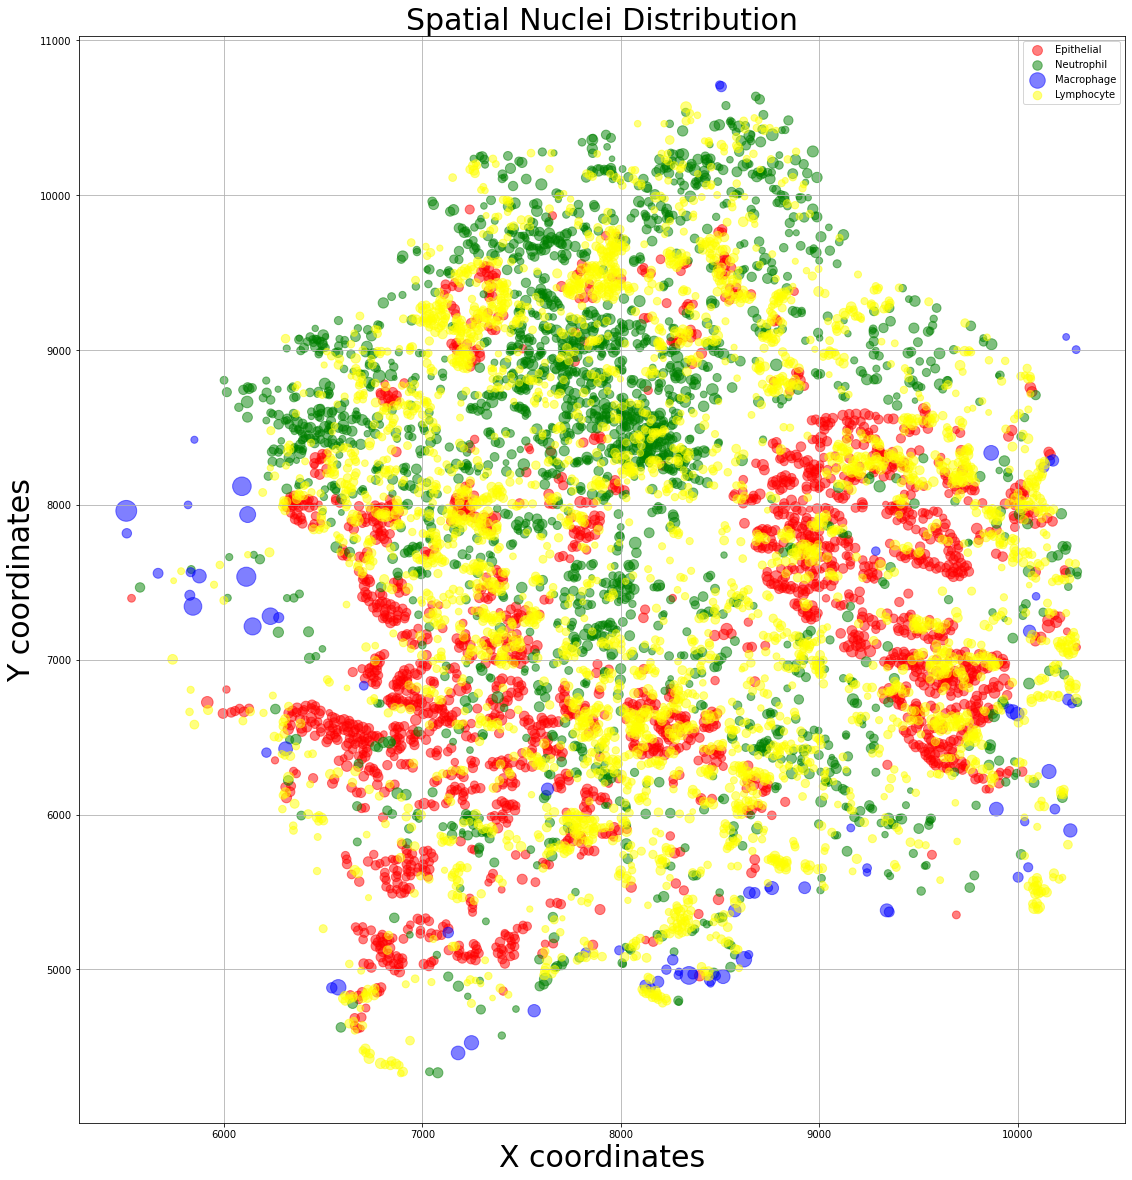

In [28]:
scatter_distribution(dataframes_path, width, height)

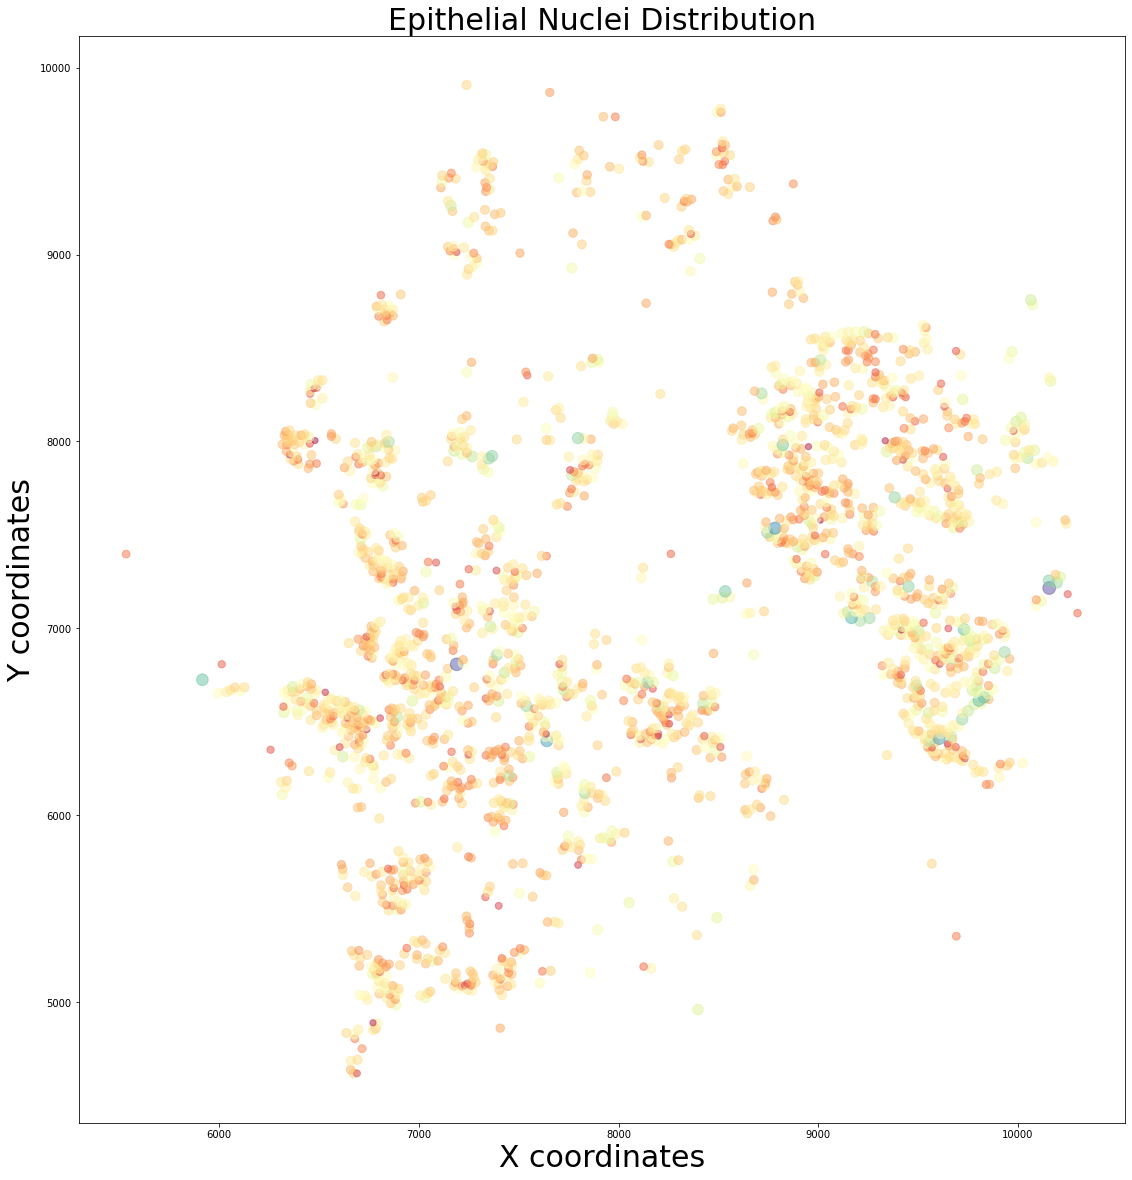

In [29]:
    scatter_distribution_epithelial(dataframes_path, width, height)

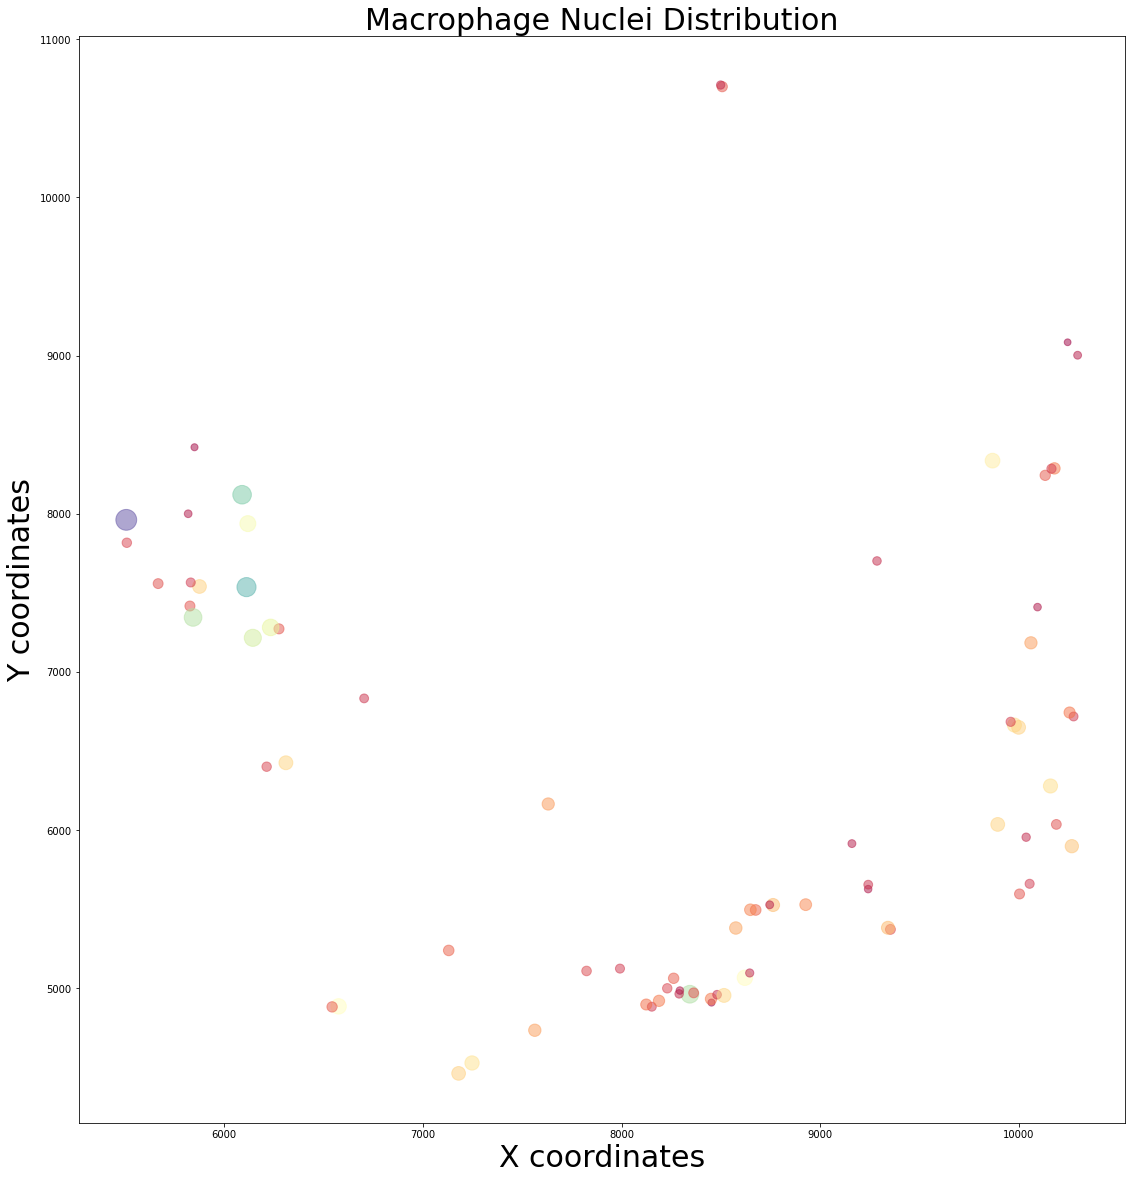

In [30]:
scatter_distribution_Macrophage(dataframes_path, width, height)

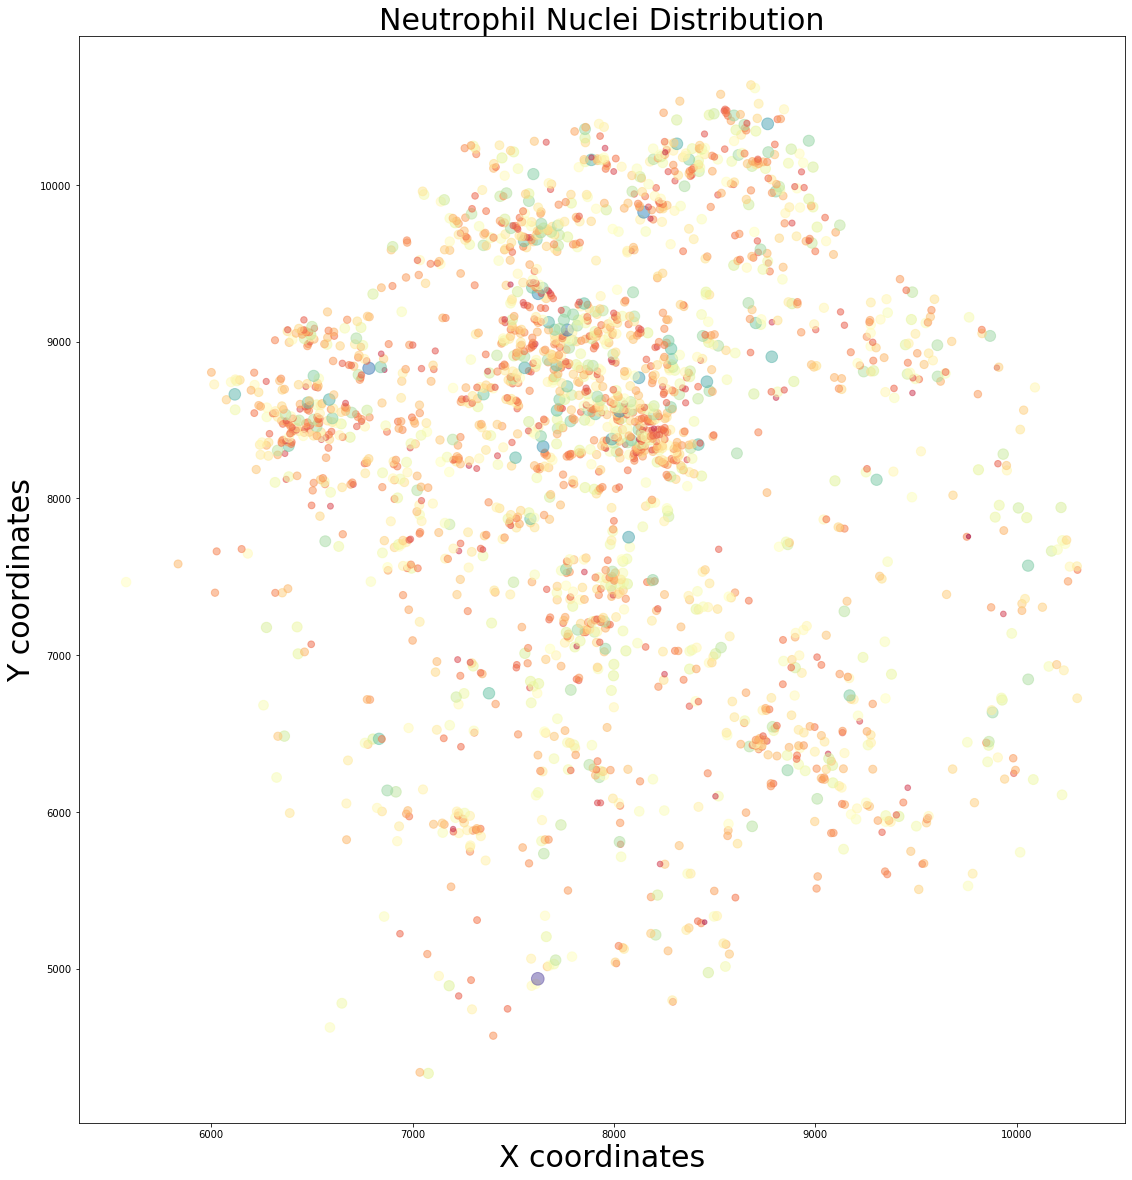

In [31]:
scatter_distribution_Neutrophil(dataframes_path, width, height)

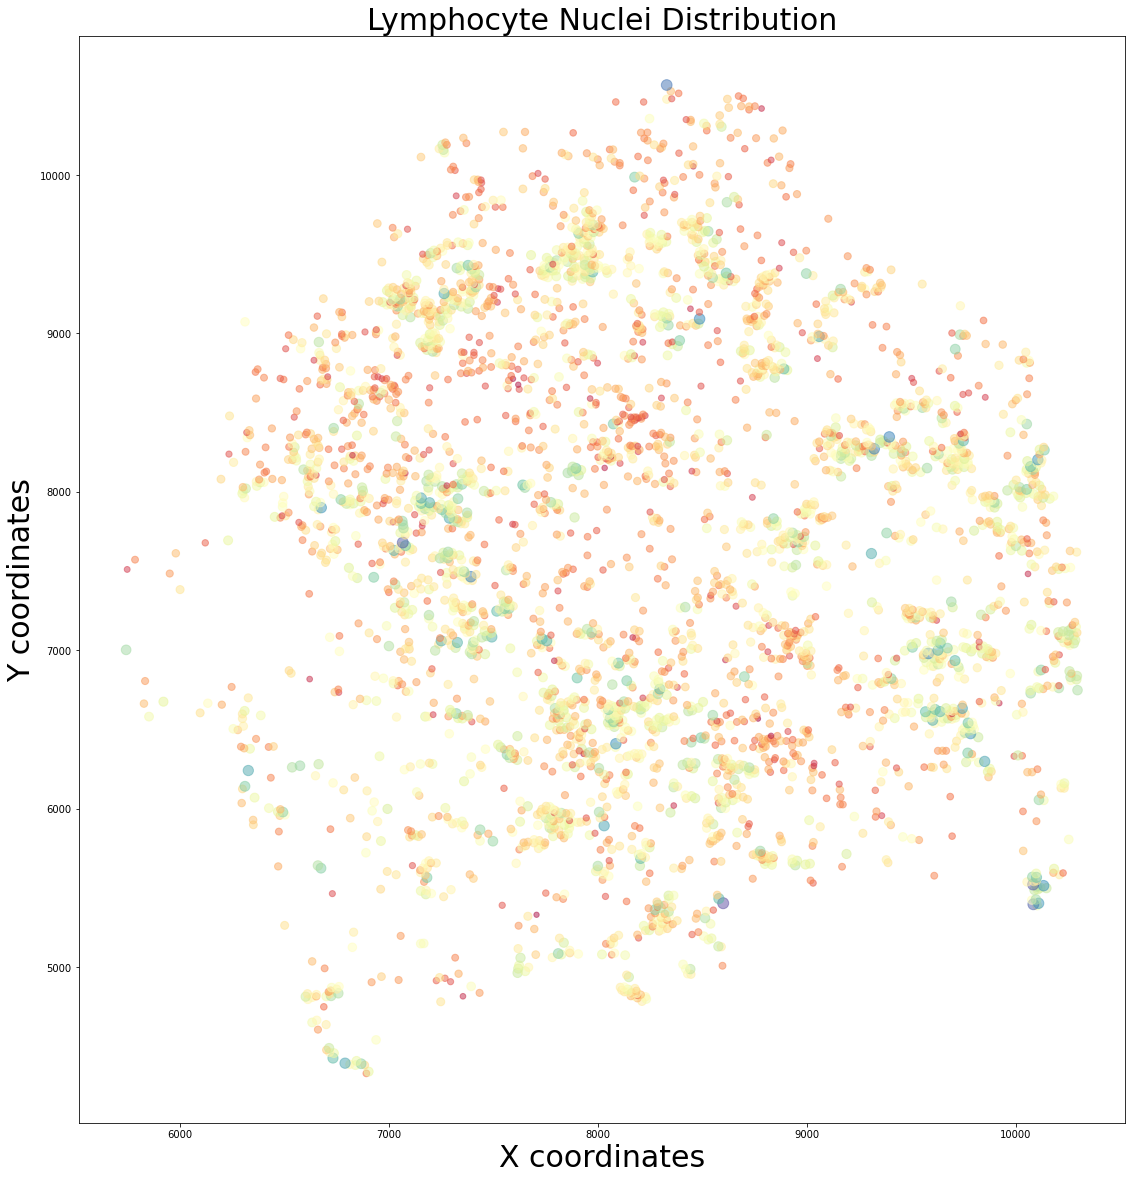

In [32]:
scatter_distribution_Lymphocyte(dataframes_path, width, height)